Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las 
variaciones de contraste.


In [3]:
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

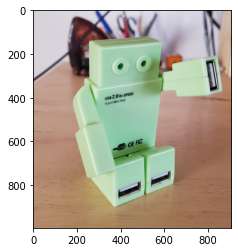

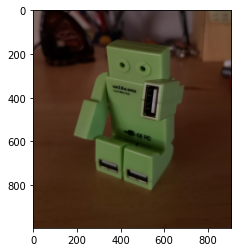

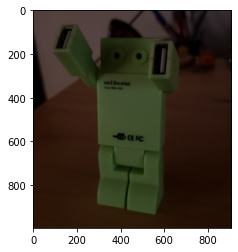

In [4]:
# Ejercicio: extraer los píxeles del tablero (color verde)
# Primera parte: encontrar un espacio de color conveniente para la discriminación

img_color1 = cv.imread(r'C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\TP1\CoordCrom_1.png')
img_color2 = cv.imread(r'C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\TP1\CoordCrom_2.png')
img_color3 = cv.imread(r'C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\TP1\CoordCrom_3.png')

imgHSV1 = cv.cvtColor(img_color1,cv.COLOR_BGR2HSV)
imgHSV2 = cv.cvtColor(img_color2,cv.COLOR_BGR2HSV)
imgHSV3 = cv.cvtColor(img_color3,cv.COLOR_BGR2HSV)

imgRGB1 = cv.cvtColor(img_color1,cv.COLOR_BGR2RGB)
imgRGB2 = cv.cvtColor(img_color2,cv.COLOR_BGR2RGB)
imgRGB3 = cv.cvtColor(img_color3,cv.COLOR_BGR2RGB)

plt.imshow(img_color1[:,:,::-1])
plt.show()
plt.imshow(img_color2[:,:,::-1])
plt.show()
plt.imshow(img_color3[:,:,::-1])
plt.show()

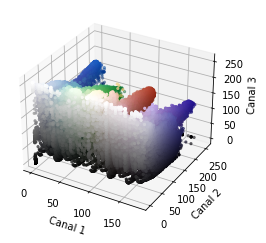

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

#r, g, b = cv.split(img_color1)
r1, g1, b1 = cv.split(imgHSV1)
r2, g2, b2 = cv.split(imgHSV2)
r3, g3, b3 = cv.split(imgHSV3)

"""r1, g1, b1 = cv.split(imgRGB1)
r2, g2, b2 = cv.split(imgRGB2)
r3, g3, b3 = cv.split(imgRGB3)"""




fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img_color1.reshape((np.shape(img_color1)[0]*np.shape(img_color1)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r1.flatten(), g1.flatten(), b1.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

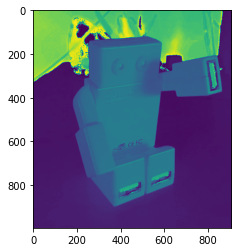

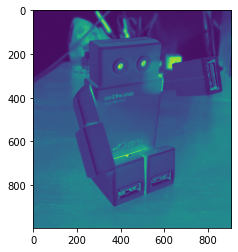

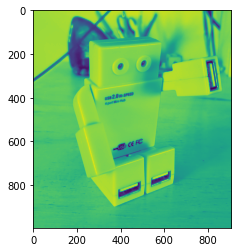

In [6]:

plt.imshow(r1)
plt.show()
plt.imshow(g1)
plt.show()
plt.imshow(b1)
plt.show()


In [34]:
# Funcion de pasaje a coordenadas cromaticas

def crom(r,g,b):
    #r=np.asarray(r)
    #g=np.asarray(g)
    #b=np.asarray(b)
    n=cv.add(r,g,b)
    control=cv.merge([r,g,b])
    rn=cv.divide(r,n)
    gn=cv.divide(g,n)
    bn=cv.divide(b,n)
    mod=np.concatenate((rn,gn,bn),axis=1)
    img=cv.merge([rn,gn,bn]) ## por alguna razon entrega una imagen negra
    #img=cv.add(rn,gn,bn)
    return(n,mod,img,control)


In [35]:
n1,mod1,img1,control1=crom(r1,g1,b1)
n2,mod2,img2,control2=crom(r2,g2,b2)
n3,mod3,img3,control3=crom(r3,g3,b3)

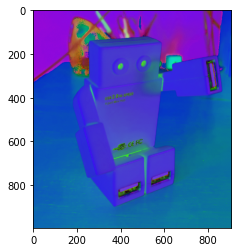

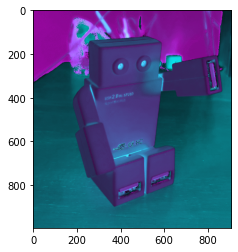

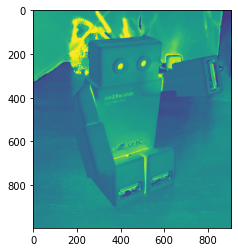

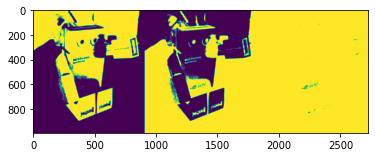

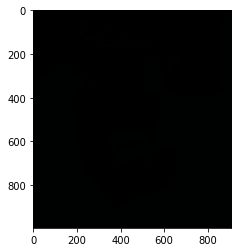

In [36]:
plt.imshow(imgHSV1)
plt.show()
plt.imshow(control1)
plt.show()
plt.imshow(n1)
plt.show()
plt.imshow(mod1)
plt.show()
plt.imshow(img1)

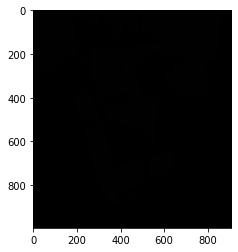

In [37]:

image2 = cv.cvtColor(img1.astype('uint8'), cv.COLOR_HSV2RGB)
plt.imshow(image2[:,:,::-1])
plt.show()

